In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from helpers.data import summary
#from helpers.plots import univariate


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("gurgaon_10k_After_feature_eng_V3.csv")
df.head()

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
0,70597758,h70597758,gurgaon,31900000.0,31900000,31900000,20202.0,1579.0,146.69 sq.m.,146.693837,146.693837,20202.0,9.0,3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,la vida by tata housing,NaN,low rise,28.532594,77.020297,3.0,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN,2,0,1,2,1,2,0
1,70436188,h70436188,gurgaon,18500000.0,18500000,18500000,9135.0,2025.0,188.13 sq.m.,188.128575,188.128575,9135.0,12.0,3 bhk flat in sector 77 gurgaon,let your dream of owning a flat come true with...,residential apartment,not available,0,5-10 Year Old Property,high rise,3.0,emaar palm heights,NaN,low rise,28.385577,76.975992,3.0,sector 77 gurgaon,emaar palm heights,emaar palm heights,NaN,2,1,1,2,1,1,0
2,70217014,l70217014,gurgaon,120600000.0,120600992,120600992,42736.0,2822.0,262.17 sq.m.,262.172266,262.172266,42736.0,9.0,5 bhk flat in sector 53 gurgaon,tulip monsella offers 5 bhk flats in sector 53...,residential apartment,not available,0,1-5 Year Old Property,high rise,5.0,tulip monsella,NaN,low rise,28.435057,77.101367,5.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1,2,1,2,1,1,0
3,70217012,x70217012,gurgaon,95300000.0,95258544,95258544,42736.0,2229.0,207.08 sq.m.,207.080787,207.080787,42736.0,9.0,4 bhk flat in sector 53 gurgaon,tulip monsella offers 4 bhk flats in sector 53...,residential apartment,not available,0,1-5 Year Old Property,high rise,4.0,tulip monsella,NaN,low rise,28.435057,77.101367,4.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1,2,1,2,1,1,0
4,70217010,a70217010,gurgaon,72000000.0,72150764,71800092,43834.0,16381646.0,152.18-152.92 sq.m.,152.918338,152.175114,43834.0,9.0,3 bhk flat in sector 53 gurgaon,tulip monsella offers 3 bhk apartments in sect...,residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,tulip monsella,NaN,low rise,28.435057,77.101367,3.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1,2,1,2,1,1,0


In [4]:
drop_cols = "MAX_PRICE MIN_PRICE MAX_AREA_SQFT MIN_AREA_SQFT PRICE_PER_UNIT_AREA SECONDARY_AREA ".split()
df.drop(columns=drop_cols, inplace=True)
df.shape

(10152, 32)

In [5]:
df.isnull().sum()

SPID                       0
PROP_ID                    0
CITY                       0
PRICE                      0
PRICE_SQFT                 0
AREA                       0
TOTAL_LANDMARK_COUNT     111
PROP_HEADING               0
DESCRIPTION                0
PROPERTY_TYPE              0
FURNISH                    0
FACING                     0
AGE                        0
TOTAL_FLOOR                0
BEDROOM_NUM              998
PROP_NAME               1836
BALCONY_NUM             1147
FLOOR_NUM                  0
LATITUDE                   0
LOGNITUDE                  0
BHK_BED                  106
LOCALITY_NAME              0
BUILDING_NAME           1836
SOCIETY_NAME            1836
ADDRESS                 5194
TRNSPORTATION              0
ACCOMODATION               0
LEISURE                    0
EDUCATION                  0
HEALTH                     0
OTHER                      0
AMENITIES_SCORE            0
dtype: int64

In [6]:
df.shape

(10152, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SPID                  10152 non-null  int64  
 1   PROP_ID               10152 non-null  object 
 2   CITY                  10152 non-null  object 
 3   PRICE                 10152 non-null  float64
 4   PRICE_SQFT            10152 non-null  float64
 5   AREA                  10152 non-null  float64
 6   TOTAL_LANDMARK_COUNT  10041 non-null  float64
 7   PROP_HEADING          10152 non-null  object 
 8   DESCRIPTION           10152 non-null  object 
 9   PROPERTY_TYPE         10152 non-null  object 
 10  FURNISH               10152 non-null  object 
 11  FACING                10152 non-null  int64  
 12  AGE                   10152 non-null  object 
 13  TOTAL_FLOOR           10152 non-null  object 
 14  BEDROOM_NUM           9154 non-null   float64
 15  PROP_NAME          

we have null values in  [TOTAL_LANDMARK_COUNT ,AGE  , BEDROOM_NUM , PROP_NAME , BALCONY_NUM , sector, , BHK_BED]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SPID                  10152 non-null  int64  
 1   PROP_ID               10152 non-null  object 
 2   CITY                  10152 non-null  object 
 3   PRICE                 10152 non-null  float64
 4   PRICE_SQFT            10152 non-null  float64
 5   AREA                  10152 non-null  float64
 6   TOTAL_LANDMARK_COUNT  10041 non-null  float64
 7   PROP_HEADING          10152 non-null  object 
 8   DESCRIPTION           10152 non-null  object 
 9   PROPERTY_TYPE         10152 non-null  object 
 10  FURNISH               10152 non-null  object 
 11  FACING                10152 non-null  int64  
 12  AGE                   10152 non-null  object 
 13  TOTAL_FLOOR           10152 non-null  object 
 14  BEDROOM_NUM           9154 non-null   float64
 15  PROP_NAME          

In [9]:
df[df.duplicated()]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SPID                  10152 non-null  int64  
 1   PROP_ID               10152 non-null  object 
 2   CITY                  10152 non-null  object 
 3   PRICE                 10152 non-null  float64
 4   PRICE_SQFT            10152 non-null  float64
 5   AREA                  10152 non-null  float64
 6   TOTAL_LANDMARK_COUNT  10041 non-null  float64
 7   PROP_HEADING          10152 non-null  object 
 8   DESCRIPTION           10152 non-null  object 
 9   PROPERTY_TYPE         10152 non-null  object 
 10  FURNISH               10152 non-null  object 
 11  FACING                10152 non-null  int64  
 12  AGE                   10152 non-null  object 
 13  TOTAL_FLOOR           10152 non-null  object 
 14  BEDROOM_NUM           9154 non-null   float64
 15  PROP_NAME          

## Univariate Analysis

In [11]:
df["CITY"].value_counts()

gurgaon    10152
Name: CITY, dtype: int64

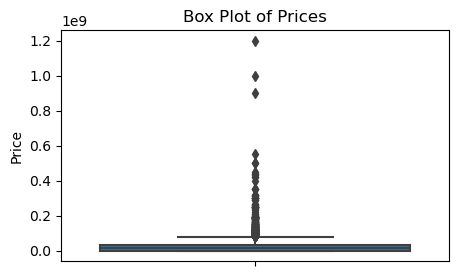

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'PRICE' is the column you want to analyze
price_column = df['PRICE']

# Box plot to visualize the distribution and identify outliers
plt.figure(figsize=(5, 3))
sns.boxplot(y=price_column)
plt.ylabel('Price')
plt.title('Box Plot of Prices')
plt.show()


In [13]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LOGNITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRNSPORTATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE'],
      dtype='object')

In [14]:
df['PRICE'].value_counts()

65000.0       120
45000.0       117
60000.0       114
20000000.0    110
35000.0       109
             ... 
8950000.0       1
28003.0         1
8720000.0       1
98400000.0      1
12100.0         1
Name: PRICE, Length: 1213, dtype: int64

## PRICE

In [15]:
df['PRICE'].describe()

count    1.015200e+04
mean     2.444448e+07
std      3.724790e+07
min      5.500000e+03
25%      1.887500e+05
50%      1.720000e+07
75%      3.250000e+07
max      1.200000e+09
Name: PRICE, dtype: float64

<Axes: >

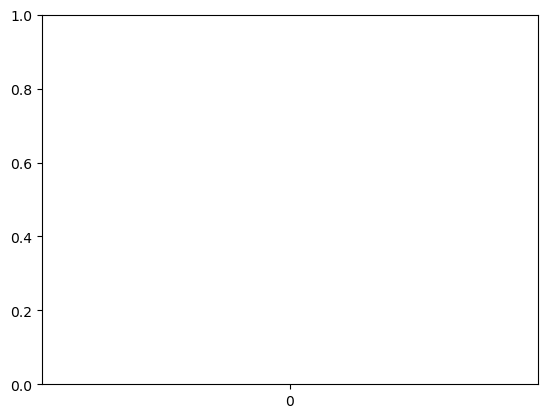

In [16]:
sns.boxplot(X =df['PRICE'] , kde=True, bins=50)

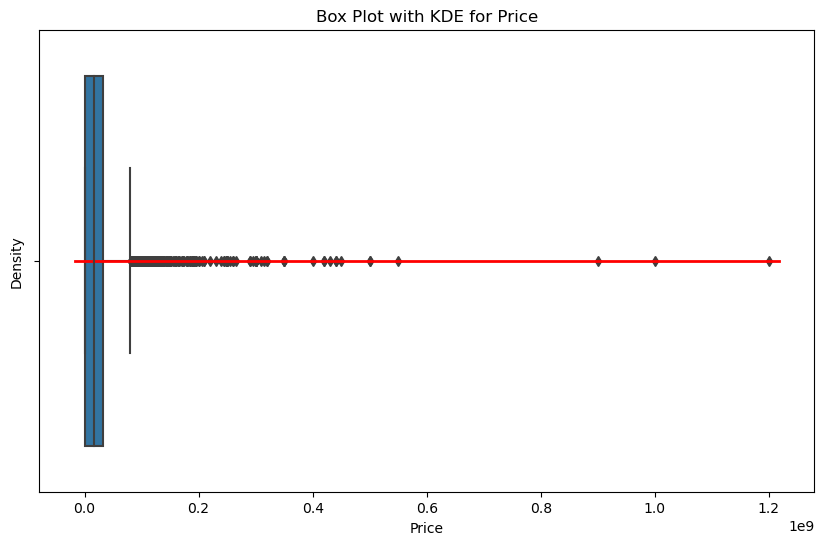

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'PRICE' is a column in it
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PRICE'])
sns.kdeplot(df['PRICE'], color='red', linewidth=2)
plt.xlabel('Price')
plt.title('Box Plot with KDE for Price')
plt.show()


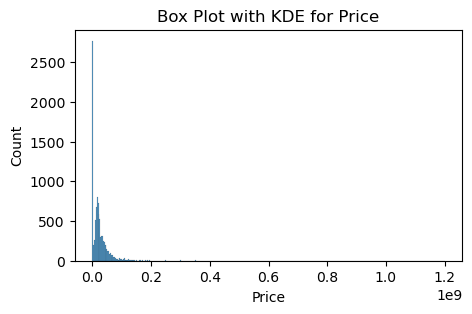

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'PRICE' is a column in it
plt.figure(figsize=(5, 3))
sns.histplot(x=df['PRICE'])
##sns.kdeplot(df['PRICE'], color='red', linewidth=2)
plt.xlabel('Price')
plt.title('Box Plot with KDE for Price')
plt.show()

<Axes: xlabel='PRICE', ylabel='Count'>

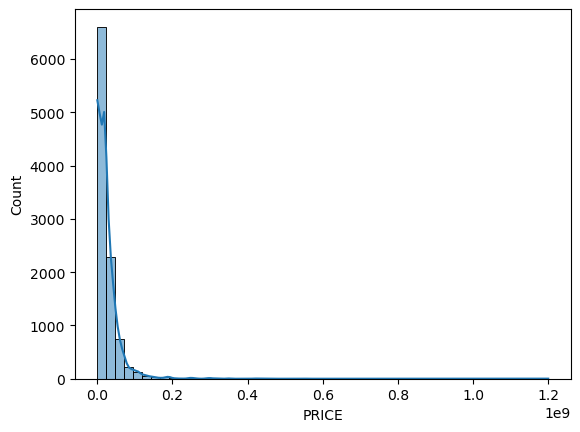

In [19]:
sns.histplot(df['PRICE'],kde=True, bins=50)

In [20]:
# PRICE < 2 Lacs
low_price_df = df.query("PRICE<20_000")
print(low_price_df.shape)
low_price_df.sample(5)

(121, 32)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
5349,66834082,z66834082,gurgaon,19500.0,28.0,1269.0,15.0,2 bhk flat in sector 104 gurgaon,socuety is well maintained and all the ameniti...,residential apartment,Semifurnished,6,0-1 Year Old Property,high rise,2.0,godrej summit,4.0,mid rise,28.483790,76.000550,2.0,sector 104 gurgaon,godrej summit,godrej summit,NaN,2,1,1,2,1,2,62
7388,70608696,v70608696,gurgaon,16000.0,10.0,1600.0,8.0,3 bhk flat in sector 92 gurgaon,this is best apartment of new gurgaon sector 9...,residential apartment,Semifurnished,8,1-5 Year Old Property,high rise,3.0,sare crescent parc,3.0,mid rise,28.414055,76.914303,3.0,sector 92 gurgaon,sare crescent parc,sare crescent parc,501,0,0,0,0,4,4,141
6169,70775290,z70775290,gurgaon,18500.0,36.0,501.0,10.0,2 bhk flat in sector 86 gurgaon,a 2 bhk flat for rent in sector 86 gurgaon clo...,residential apartment,Semifurnished,5,5-10 Year Old Property,high rise,2.0,pyramid urban homes 2,1.0,mid rise,28.397604,76.942701,2.0,sector 86 gurgaon,pyramid urban homes 2,pyramid urban homes 2,166,1,1,1,2,1,2,76
6596,70882580,e70882580,gurgaon,19300.0,13.0,1380.0,15.0,2 bhk flat in sector 37d gurgaon,this 2 bhk flat in sector 37d gurgaon is avail...,residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,2.0,ramprastha the edge towers,3.0,high rise,28.446516,76.968368,2.0,sector 37d gurgaon,ramprastha the edge towers,ramprastha the edge towers,NaN,0,1,1,3,2,1,110
4120,70794156,m70794156,gurgaon,8500.0,8.0,1002.0,12.0,2 bhk flat in sector 95a gurgaon,"signature global the roselia, sector 95a, near...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,2.0,signature the roselia,1.0,mid rise,28.424060,76.927954,2.0,sector 95a gurgaon,signature the roselia,signature the roselia,428,2,1,1,2,1,1,33


In [21]:
low_price_df["PROPERTY_TYPE"].value_counts()

residential apartment        96
independent/builder floor    21
independent house/villa       4
Name: PROPERTY_TYPE, dtype: int64

<Axes: xlabel='PRICE', ylabel='Count'>

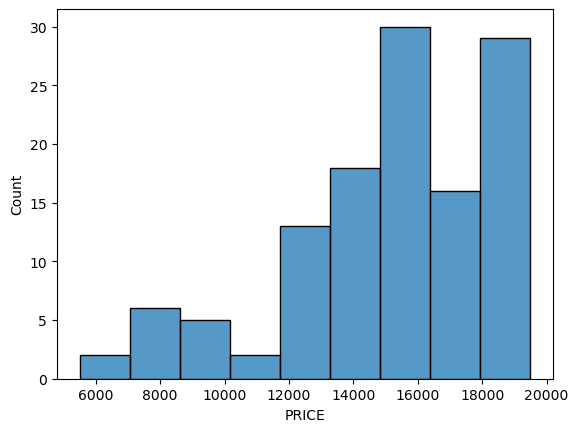

In [22]:
sns.histplot(low_price_df["PRICE"])

<Axes: xlabel='PRICE'>

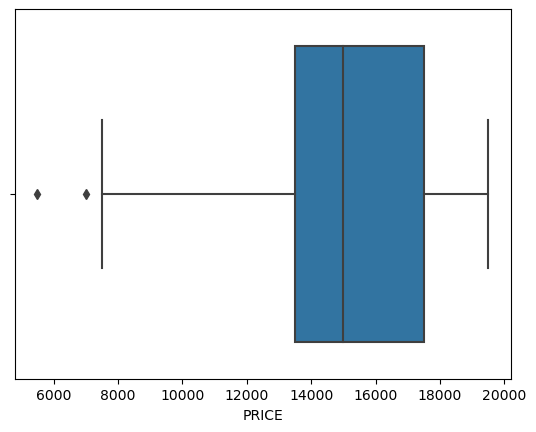

In [23]:
sns.boxplot(x =low_price_df["PRICE"])

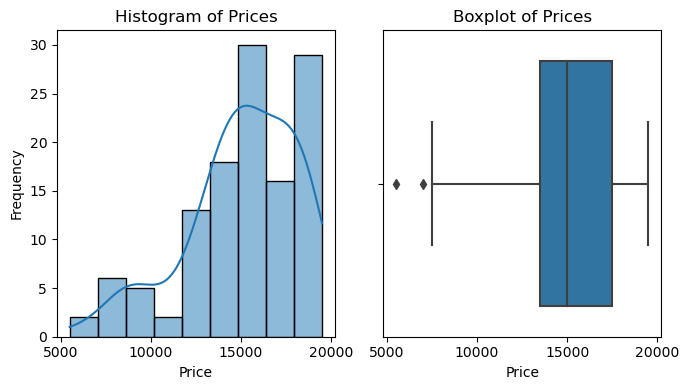

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming low_price_df is your DataFrame with 'PRICE' column
# Replace 'low_price_df' with your actual DataFrame name if different

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

# Plot histogram on the first subplot
sns.histplot(low_price_df["PRICE"], kde=True, ax=ax[0])
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Prices')

# Plot boxplot on the second subplot
sns.boxplot(x=low_price_df["PRICE"], ax=ax[1])
ax[1].set_xlabel('Price')
ax[1].set_title('Boxplot of Prices')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [25]:
low_price_df ["LOCALITY_NAME"].value_counts()  

sector 37d gurgaon             14
sector 95 gurgaon              12
sector 86 gurgaon              11
sohna                           9
sector 82 gurgaon               7
sector 102 gurgaon              7
sector 95a gurgaon              6
sector 90 gurgaon               6
sector 83 gurgaon               6
sector 56 gurgaon               5
sector 70a gurgaon              4
sector 107 gurgaon              3
sector 103 gurgaon              2
sector 92 gurgaon               2
sector 23a gurgaon              2
sector 81 gurgaon               2
sector 37c gurgaon              2
sector 67 gurgaon               2
sector 2 gurgaon                2
sector 99 gurgaon               2
sector 104 gurgaon              1
sector 22 gurgaon               1
dwarka expressway gurgaon       1
sector-33 sohna                 1
sector 26 gurgaon               1
c block sushant lok phase 1     1
sector 23 gurgaon               1
sector 84 gurgaon               1
malibu town                     1
ashok vihar ph

In [26]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LOGNITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRNSPORTATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE'],
      dtype='object')

In [27]:
import numpy as np

def calculate_summary_stats(df, column):
    """
    Calculate summary statistics for a specified column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame.
    column (str): The column for which to calculate summary statistics.
    
    Returns:
    dict: A dictionary containing the calculated summary statistics.
    """
    summary_stats = {
        'count': df[column].count(),
        'mean': df[column].mean(),
        'std': df[column].std(),
        'min': df[column].min(),
        '1%': np.percentile(df[column], 1),
        '5%': np.percentile(df[column], 5),
        '25%': df[column].quantile(0.25),
        '50%': df[column].median(),
        '75%': df[column].quantile(0.75),
        '95%': np.percentile(df[column], 95),
        '99%': np.percentile(df[column], 99),
        'max': df[column].max(),
        'skew': df[column].skew(),
        'kurtosis': df[column].kurtosis(),
        'notnull': df[column].notnull().sum(),
        'isnull': df[column].isnull().sum()
    }
    
    return summary_stats

# Example usage
# Replace 'your_dataframe' with your actual DataFrame and 'PRICE' with the desired column
# summary_stats = calculate_summary_stats(your_dataframe, 'PRICE')


## High Price DataFrame

In [28]:
# PRICE > 96%tile
high_price_df = df.query(f"PRICE>{df['PRICE'].quantile(0.96)}")
print(high_price_df.shape)
high_price_df.sample(5)

(407, 32)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
7565,70649346,o70649346,gurgaon,92500000.0,22155.0,4175.0,11.0,4 bhk flat in mg road,this lovely 4 bhk apartment/flat in mg road is...,residential apartment,Semifurnished,5,5-10 Year Old Property,high rise,4.0,suncity platinum towers,2.0,high rise,28.472761,77.085959,4.0,mg road,suncity platinum towers,suncity platinum towers,NaN,2,0,2,3,2,1,150
6163,70819314,u70819314,gurgaon,107500000.0,267412.0,3618.0,44.0,residential land / plot in dlf phase 2,"address: dlf phase 2, gurgaon, haryana\ngood d...",residential land,not available,3,0-1 Year Old Property,mid rise,NaN,NaN,NaN,low rise,28.488963,77.086665,2.0,dlf phase 2,NaN,NaN,NaN,5,2,0,0,9,3,5
3676,70250390,q70250390,gurgaon,320000000.0,313111.0,9198.0,46.0,residential land / plot in dlf phase 1,1022 yards plot sell in dlf phase 1 2 side ope...,residential land,not available,5,0-1 Year Old Property,mid rise,NaN,NaN,NaN,low rise,28.475491,77.103210,1.0,dlf phase 1,NaN,NaN,NaN,6,1,0,0,21,1,24
6469,70645114,h70645114,gurgaon,125000000.0,250000.0,4500.0,10.0,residential land / plot in sector 65 gurgaon,park facing plot in a gated and secured townsh...,residential land,not available,3,0-1 Year Old Property,mid rise,NaN,emaar emerald hills,NaN,low rise,28.407289,77.069686,65.0,sector 65 gurgaon,emaar emerald hills,emaar emerald hills,ivory,1,1,1,2,1,1,24
9873,69917628,a69917628,gurgaon,120000000.0,333333.0,3240.0,14.0,4 bedroom house in sector 66 gurgaon,emaar marbella villa available for sale. plot ...,independent house/villa,Unfurnished,5,0-1 Year Old Property,low rise,4.0,emaar mgf marbella,2.0,low rise,28.399559,77.061027,4.0,sector 66 gurgaon,emaar mgf marbella,emaar mgf marbella,NaN,2,1,1,2,1,2,116


In [29]:
high_price_df["PROPERTY_TYPE"].value_counts()

residential land             131
independent house/villa      126
residential apartment        119
independent/builder floor     18
farm house                    13
Name: PROPERTY_TYPE, dtype: int64

In [30]:
high_price_df["LOCALITY_NAME"].value_counts()

dlf phase 1                      37
sector 54 gurgaon                35
sector 42 gurgaon                30
dlf phase 2                      22
sector 65 gurgaon                21
                                 ..
sector 106 gurgaon                1
block b sushant lok phase - 3     1
baliawas                          1
sector 60 gurgaon                 1
uppals southend                   1
Name: LOCALITY_NAME, Length: 77, dtype: int64

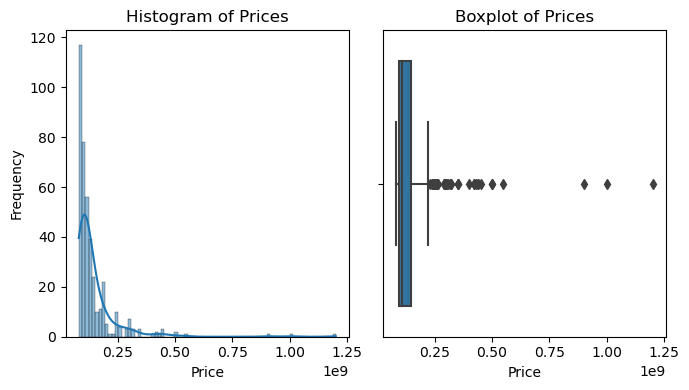

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming low_price_df is your DataFrame with 'PRICE' column
# Replace 'low_price_df' with your actual DataFrame name if different

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

# Plot histogram on the first subplot
sns.histplot(high_price_df["PRICE"], kde=True, ax=ax[0])
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Prices')

# Plot boxplot on the second subplot
sns.boxplot(x=high_price_df["PRICE"], ax=ax[1])
ax[1].set_xlabel('Price')
ax[1].set_title('Boxplot of Prices')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


For now, all the feature seems right to me except the PRICE, PRICE_SQFT, AREA are odd.


I can't ignore/drop them because they are about 3000+ data.

I need to go to the website using its the property URL and investigate what's happening.
This same senario goes for PRICE_SQFT and AREA features. That's why I am not going to analyse them like this.

I am going to drop these for now to perform better EDA.

 ## AREA

In [32]:
df["AREA"].describe()

count    1.015200e+04
mean     2.461834e+05
std      5.497451e+06
min      1.000000e+00
25%      1.611000e+03
50%      2.100000e+03
75%      2.750000e+03
max      3.243126e+08
Name: AREA, dtype: float64

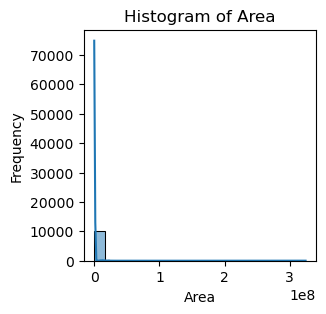

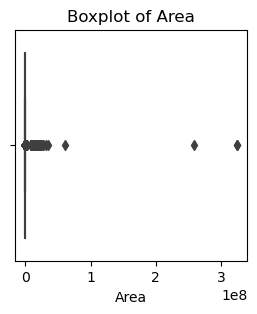

<Figure size 800x600 with 0 Axes>

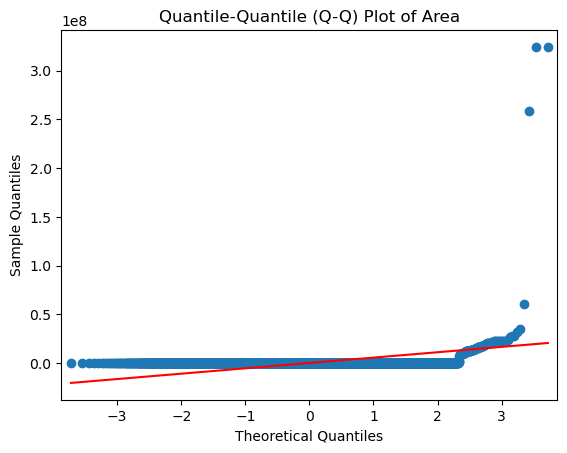

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
# Assuming df is your DataFrame with the "AREA" column
# Replace 'df' with your actual DataFrame name if different

# Step 1: Summary Statistics
summary_stats = df['AREA'].describe()

# Step 2: Histogram
plt.figure(figsize=(3, 3))
sns.histplot(df['AREA'], kde=True, bins=20)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area')
plt.show()

# Step 3: Boxplot
plt.figure(figsize=(3, 3))
sns.boxplot(x=df['AREA'])
plt.xlabel('Area')
plt.title('Boxplot of Area')
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(df['AREA'], line='s')
plt.title('Quantile-Quantile (Q-Q) Plot of Area')
plt.show()

Summary Statistics for AREA:
count    1.015200e+04
mean     2.461834e+05
std      5.497451e+06
min      1.000000e+00
25%      1.611000e+03
50%      2.100000e+03
75%      2.750000e+03
max      3.243126e+08
Name: AREA, dtype: float64


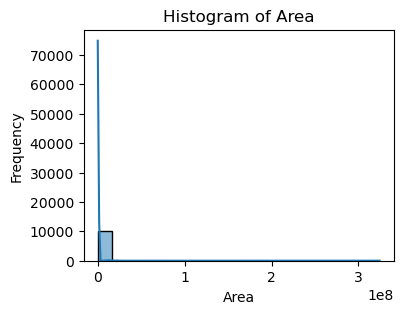

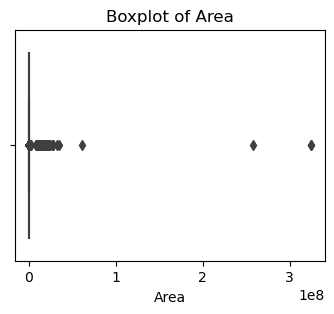

<Figure size 400x300 with 0 Axes>

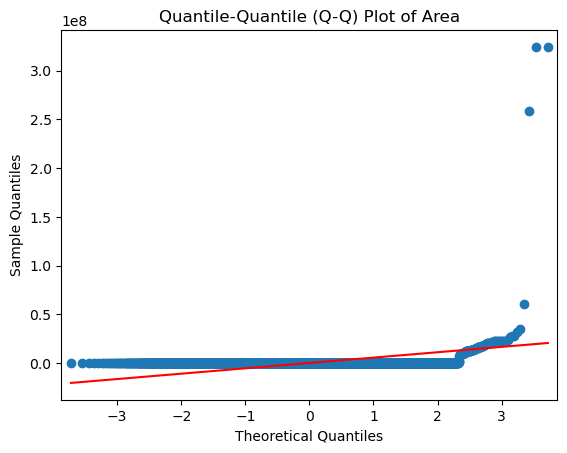

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

def analyze_area_column(df):
    """
    Perform univariate analysis on the 'AREA' column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the 'AREA' column.
    """
    # Step 1: Summary Statistics
    summary_stats = df['AREA'].describe()
    print('Summary Statistics for AREA:')
    print(summary_stats)
    
    # Step 2: Histogram
    plt.figure(figsize=(4, 3))
    sns.histplot(df['AREA'], kde=True, bins=20)
    plt.xlabel('Area')
    plt.ylabel('Frequency')
    plt.title('Histogram of Area')
    plt.show()
    
    # Step 3: Boxplot
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df['AREA'])
    plt.xlabel('Area')
    plt.title('Boxplot of Area')
    plt.show()
    
    # QQ plot
    plt.figure(figsize=(4, 3))
    sm.qqplot(df['AREA'], line='s')
    plt.title('Quantile-Quantile (Q-Q) Plot of Area')
    plt.show()

# Assuming df is your DataFrame with the 'AREA' column
# Replace 'df' with your actual DataFrame name if different
analyze_area_column(df)


In [35]:
high_area_df = df[df['AREA']>df['AREA'].quantile(0.95)]
high_area_df.shape

(503, 32)

In [36]:
high_area_df['AREA'].describe()

count    5.030000e+02
mean     4.926799e+06
std      2.424924e+07
min      5.400000e+03
25%      6.775000e+03
50%      1.522800e+04
75%      9.801000e+04
max      3.243126e+08
Name: AREA, dtype: float64

Summary Statistics for AREA:
count    5.030000e+02
mean     4.926799e+06
std      2.424924e+07
min      5.400000e+03
25%      6.775000e+03
50%      1.522800e+04
75%      9.801000e+04
max      3.243126e+08
Name: AREA, dtype: float64


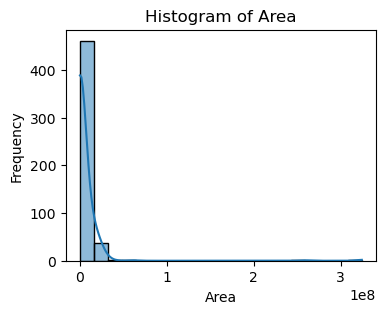

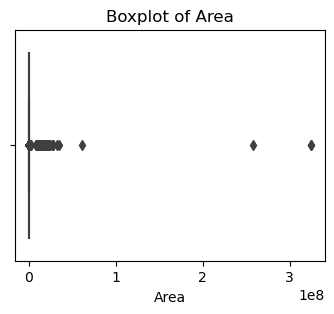

<Figure size 400x300 with 0 Axes>

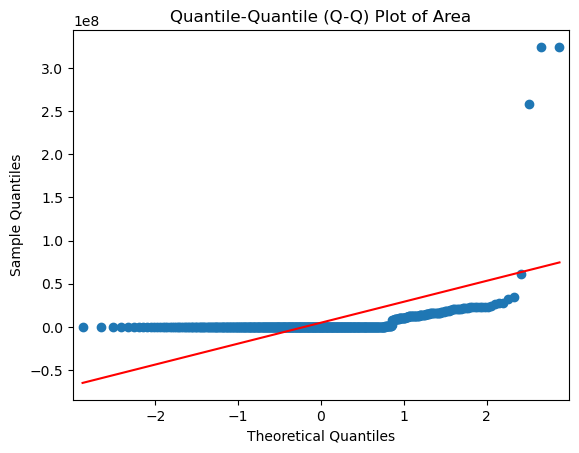

In [37]:
def analyze_area_column(df):
    """
    Perform univariate analysis on the 'AREA' column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the 'AREA' column.
    """
    # Step 1: Summary Statistics
    summary_stats = high_area_df['AREA'].describe()
    print('Summary Statistics for AREA:')
    print(summary_stats)
    
    # Step 2: Histogram
    plt.figure(figsize=(4, 3))
    sns.histplot(high_area_df['AREA'], kde=True, bins=20)
    plt.xlabel('Area')
    plt.ylabel('Frequency')
    plt.title('Histogram of Area')
    plt.show()
    
    # Step 3: Boxplot
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df['AREA'])
    plt.xlabel('Area')
    plt.title('Boxplot of Area')
    plt.show()
    
    # QQ plot
    plt.figure(figsize=(4, 3))
    sm.qqplot(high_area_df['AREA'], line='s')
    plt.title('Quantile-Quantile (Q-Q) Plot of Area')
    plt.show()

# Assuming df is your DataFrame with the 'AREA' column
# Replace 'df' with your actual DataFrame name if different
analyze_area_column(df)

In [38]:
df['AREA'].head(5).max()

16381646.0

## filtered_df
filtered_df repersents the perfect dataset for the model because it has no outliers for PRICE and AREA features.


In [39]:
filtered_df = df.copy(True)
filtered_df.shape

(10152, 32)

In [40]:
filtered_df.drop(index=low_price_df.index, inplace=True, errors="ignore")
filtered_df.drop(index=high_price_df.index, inplace=True, errors="ignore")
filtered_df.drop(index=high_area_df.index, inplace=True, errors="ignore")
filtered_df.shape

(9267, 32)

In [41]:
df[['AREA' ,"PRICE"]].describe()

,AREA,PRICE
count,1.015200e+04,1.015200e+04
mean,2.461834e+05,2.444448e+07
std,5.497451e+06,3.724790e+07
min,1.000000e+00,5.500000e+03
25%,1.611000e+03,1.887500e+05
50%,2.100000e+03,1.720000e+07
75%,2.750000e+03,3.250000e+07
max,3.243126e+08,1.200000e+09


In [42]:
df['AREA']

0            1579.0
1            2025.0
2            2822.0
3            2229.0
4        16381646.0
            ...    
10147        2875.0
10148        2100.0
10149        1580.0
10150        3300.0
10151        3200.0
Name: AREA, Length: 10152, dtype: float64

In [43]:
filtered_df['PRICE'].describe()

count    9.267000e+03
mean     1.931692e+07
std      1.810127e+07
min      2.000000e+04
25%      1.500000e+05
50%      1.650000e+07
75%      2.900000e+07
max      8.050000e+07
Name: PRICE, dtype: float64

In [44]:
df[df['AREA']>df['AREA'].quantile(0.95)]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
4,70217010,a70217010,gurgaon,72000000.0,43834.0,16381646.0,9.0,3 bhk flat in sector 53 gurgaon,tulip monsella offers 3 bhk apartments in sect...,residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,tulip monsella,NaN,low rise,28.435057,77.101367,3.0,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1,2,1,2,1,1,0
5,70069208,k70069208,gurgaon,19500000.0,8860.0,17502650.0,9.0,3 bhk flat in sector 89 a gurgaon,make ats marigold your next home. this project...,residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,ats marigold,NaN,low rise,28.437338,76.944059,3.0,sector 89 a gurgaon,ats marigold,ats marigold,NaN,1,0,1,3,1,1,0
7,68240962,t68240962,gurgaon,28400000.0,14599.0,18502050.0,14.0,3 bhk flat in sector 113 gurgaon,experience a new style of living with smartwor...,residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,smartworld one dxp,NaN,low rise,28.523461,77.026955,3.0,sector 113 gurgaon,smartworld one dxp,smartworld one dxp,NaN,3,1,1,2,1,2,0
14,70626446,p70626446,gurgaon,42400000.0,24302.0,15811911.0,12.0,4 bhk flat in sector 108 gurgaon,"own a 4 bhk apartment in sobha city, sector 10...",residential apartment,not available,0,5-10 Year Old Property,high rise,4.0,sobha city,NaN,low rise,28.516331,76.995685,4.0,sector 108 gurgaon,sobha city,sobha city,NaN,2,1,1,2,1,1,0
15,70626444,z70626444,gurgaon,32400000.0,25027.0,11111512.0,12.0,3 bhk flat in sector 108 gurgaon,let your dream of owning a flat come true with...,residential apartment,not available,0,5-10 Year Old Property,high rise,3.0,sobha city,NaN,low rise,28.516331,76.995685,3.0,sector 108 gurgaon,sobha city,sobha city,NaN,2,1,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,69938952,r69938952,gurgaon,34000000.0,11333333.0,130680.0,2.0,2 bedroom farm house in sohna,agriculture land on highway nh 248a good location,farm house,Unfurnished,5,1-5 Year Old Property,mid rise,2.0,nuh to sohna road,2.0,low rise,28.249352,77.067276,2.0,sohna,nuh to sohna road,nuh to sohna road,c13,0,0,0,0,2,0,49
10133,69937912,d69937912,gurgaon,24500000.0,24500000.0,43560.0,NaN,2 bedroom farm house in sohna,one acre farmhouse has a legacy of transformin...,farm house,Unfurnished,3,1-5 Year Old Property,mid rise,2.0,vatika westin sohna resort,2.0,low rise,28.237599,77.149407,2.0,sohna,vatika westin sohna resort,vatika westin sohna resort,c15,0,0,0,0,0,0,68
10134,69914462,a69914462,gurgaon,52500000.0,26250000.0,87120.0,NaN,3 bedroom farm house in sohna,2 acre farmhouse has a legacy of transforming ...,farm house,Unfurnished,5,5-10 Year Old Property,mid rise,3.0,vatika westin sohna resort,4.0,low rise,28.237599,77.149407,3.0,sohna,vatika westin sohna resort,vatika westin sohna resort,a35,0,0,0,0,0,0,81
10135,69914208,n69914208,gurgaon,34000000.0,34000000.0,43560.0,NaN,3 bedroom farm house in sohna,one acre farmhouse has a legacy of transformin...,farm house,Unfurnished,5,1-5 Year Old Property,mid rise,3.0,vatika westin sohna resort,4.0,low rise,28.237599,77.149407,3.0,sohna,vatika westin sohna resort,vatika westin sohna resort,a44,0,0,0,0,0,0,77


## TOTAL_LANDMARK_COUNT

In [45]:
df.head(1)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
0,70597758,h70597758,gurgaon,31900000.0,20202.0,1579.0,9.0,3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,la vida by tata housing,NaN,low rise,28.532594,77.020297,3.0,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN,2,0,1,2,1,2,0


In [46]:
df["TOTAL_LANDMARK_COUNT"].describe()

count    10041.000000
mean        21.783986
std         16.475433
min          1.000000
25%         10.000000
50%         13.000000
75%         45.000000
max         50.000000
Name: TOTAL_LANDMARK_COUNT, dtype: float64

<Axes: xlabel='TOTAL_LANDMARK_COUNT', ylabel='Count'>

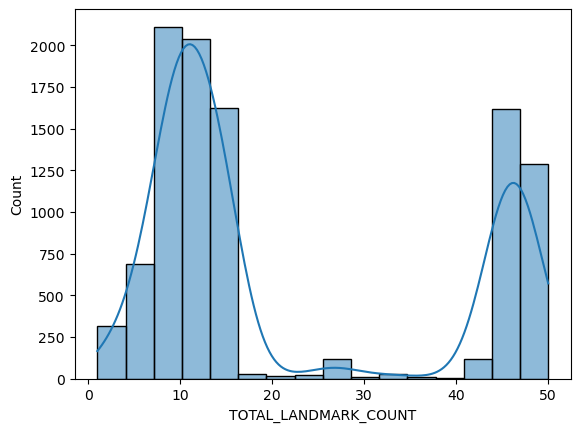

In [47]:
sns.histplot(df["TOTAL_LANDMARK_COUNT"],kde=True)

In [48]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LOGNITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRNSPORTATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE'],
      dtype='object')

<Axes: xlabel='PROP_HEADING', ylabel='Count'>

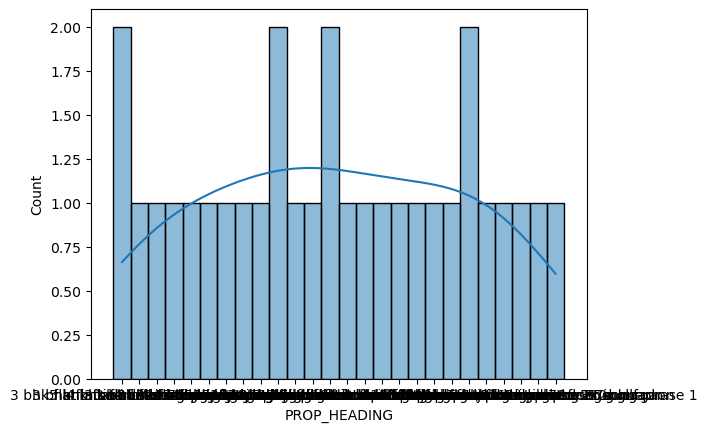

In [49]:
sns.histplot(df['PROP_HEADING'].head(30) , kde=True)

In [50]:
df['PROP_HEADING'].head(6)

0     3 bhk flat in sector 113 gurgaon
1      3 bhk flat in sector 77 gurgaon
2      5 bhk flat in sector 53 gurgaon
3      4 bhk flat in sector 53 gurgaon
4      3 bhk flat in sector 53 gurgaon
5    3 bhk flat in sector 89 a gurgaon
Name: PROP_HEADING, dtype: object

In [51]:
df['PROP_HEADING'].str.get(0)

0        3
1        3
2        5
3        4
4        3
        ..
10147    4
10148    3
10149    3
10150    r
10151    4
Name: PROP_HEADING, Length: 10152, dtype: object

In [52]:
df['DESCRIPTION']

0        there is a 3 bhk apartment in sector 113, gurg...
1        let your dream of owning a flat come true with...
2        tulip monsella offers 5 bhk flats in sector 53...
3        tulip monsella offers 4 bhk flats in sector 53...
4        tulip monsella offers 3 bhk apartments in sect...
                               ...                        
10147    this is a nice project. situated in a central ...
10148    this is a nice project. situated in a central ...
10149    3 bhk servant room independent builder floor a...
10150         awesome location wide road north east facing
10151    well maintained ground floor built up house no...
Name: DESCRIPTION, Length: 10152, dtype: object

## PROPERTY_TYPE

In [53]:
df.drop(df[df['PROPERTY_TYPE'] == 'farm house'].index, inplace = True)

In [54]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'TOTAL_LANDMARK_COUNT', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'BEDROOM_NUM', 'PROP_NAME',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LOGNITUDE', 'BHK_BED',
       'LOCALITY_NAME', 'BUILDING_NAME', 'SOCIETY_NAME', 'ADDRESS',
       'TRNSPORTATION', 'ACCOMODATION', 'LEISURE', 'EDUCATION', 'HEALTH',
       'OTHER', 'AMENITIES_SCORE'],
      dtype='object')

In [55]:
df['PROPERTY_TYPE'].value_counts()

residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
Name: PROPERTY_TYPE, dtype: int64

<Axes: xlabel='PROPERTY_TYPE', ylabel='Count'>

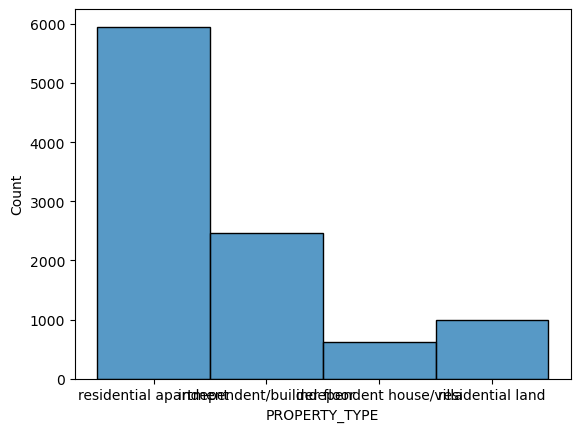

In [56]:
sns.histplot(df['PROPERTY_TYPE'])

In [57]:
df.shape

(10032, 32)

In [58]:
res_apartment= df.query("PROPERTY_TYPE == 'residential apartment'")
ind_builder_floor = df.query("PROPERTY_TYPE == 'independent/builder floor'")
res_land = df.query("PROPERTY_TYPE == 'residential land'")
ind_house= df.query("PROPERTY_TYPE == 'independent house/villa'")

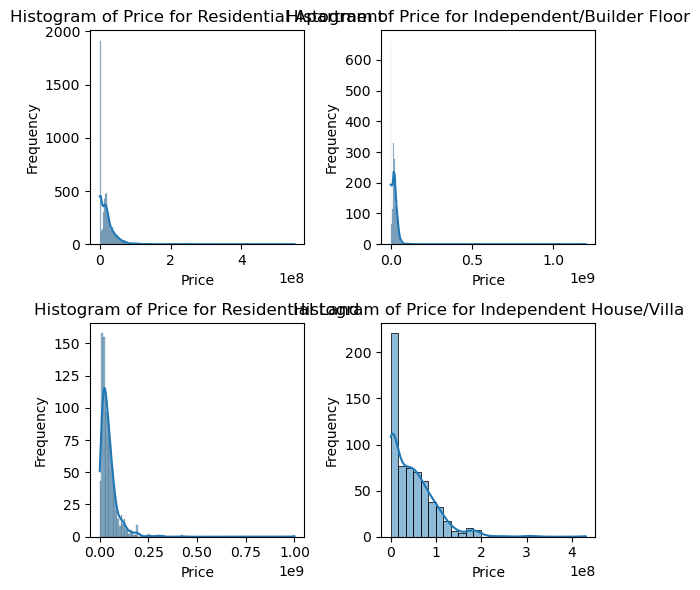

In [59]:
# Assuming res_apartment, ind_builder_floor, res_land, and ind_house are your filtered DataFrames
# Replace them with your actual filtered DataFrames

# Create subplots for each property type
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over the DataFrames and plot histograms
for i, (property_type, data) in enumerate(zip(['Residential Apartment', 'Independent/Builder Floor', 
                                               'Residential Land', 'Independent House/Villa'], 
                                              [res_apartment, ind_builder_floor, res_land, ind_house])):
    sns.histplot(data['PRICE'], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of Price for {property_type}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

# Hide the empty subplot if any
if len(axes) > 4:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


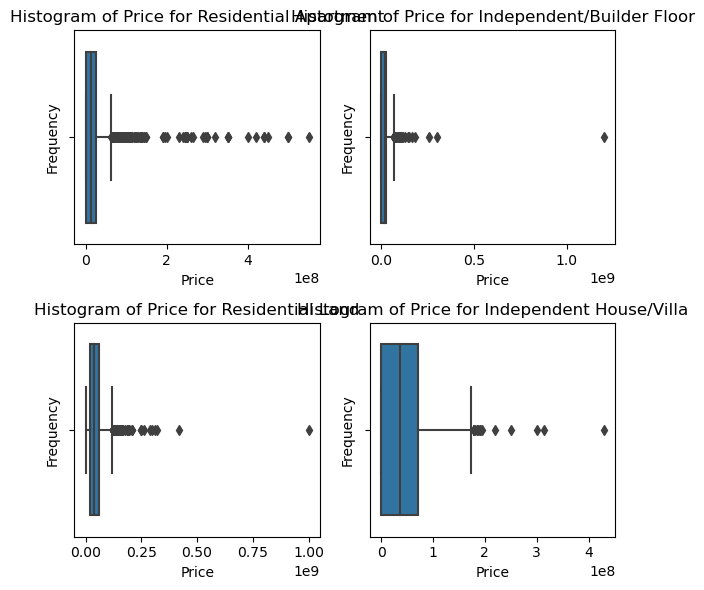

In [60]:
# Assuming res_apartment, ind_builder_floor, res_land, and ind_house are your filtered DataFrames
# Replace them with your actual filtered DataFrames

# Create subplots for each property type
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over the DataFrames and plot histograms
for i, (property_type, data) in enumerate(zip(['Residential Apartment', 'Independent/Builder Floor', 
                                               'Residential Land', 'Independent House/Villa'], 
                                              [res_apartment, ind_builder_floor, res_land, ind_house])):
    sns.boxplot(x =data['PRICE'], ax=axes[i])
    axes[i].set_title(f'Histogram of Price for {property_type}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

# Hide the empty subplot if any
if len(axes) > 4:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


## BALCONY_NUM

In [61]:
df['BALCONY_NUM'].value_counts()

4.0    2903
3.0    2796
2.0    2718
1.0     441
0.0      27
Name: BALCONY_NUM, dtype: int64

<Axes: xlabel='BALCONY_NUM', ylabel='Count'>

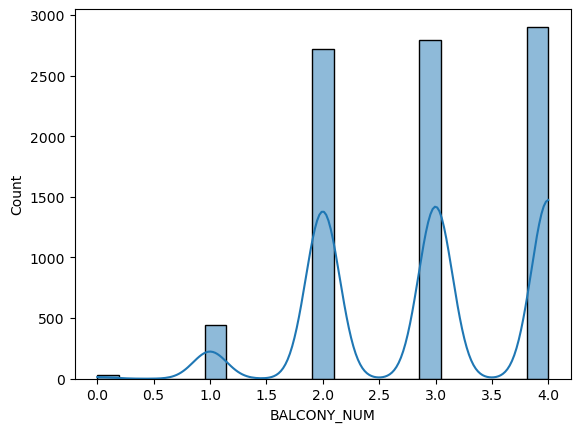

In [62]:
sns.histplot(df['BALCONY_NUM'] , kde = True)

<Axes: xlabel='BALCONY_NUM'>

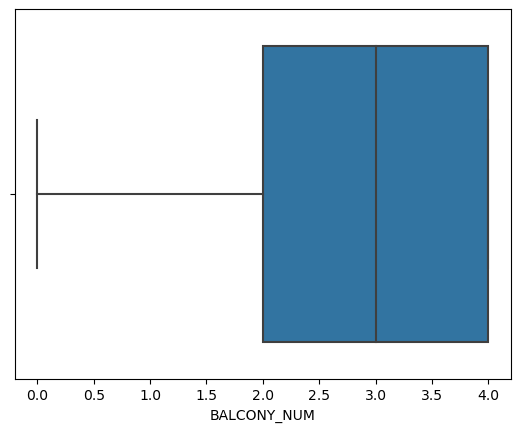

In [63]:
sns.boxplot(x=df['BALCONY_NUM']) 

## FURNISH

<Axes: >

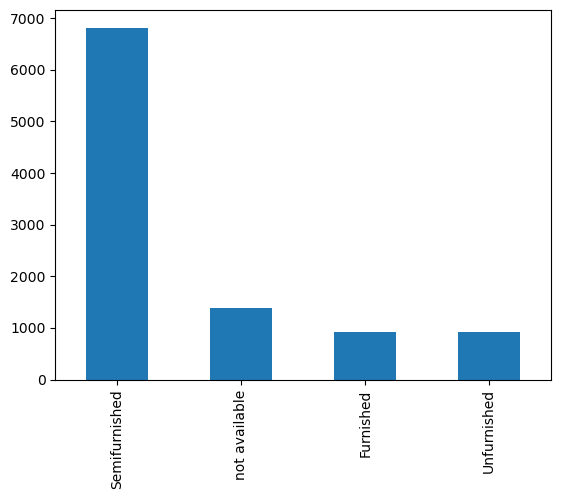

In [64]:

df["FURNISH"].value_counts().plot.bar()

Highly imblacnced.

Many properties have not a FURNISH value i.e. not available.

## FACING

<Axes: >

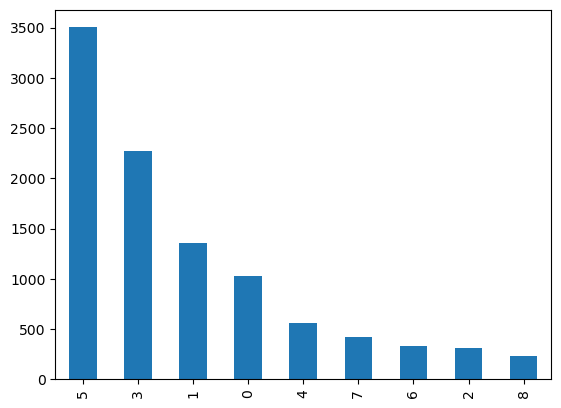

In [65]:
df['FACING'].value_counts().plot.bar()

<Axes: xlabel='FACING'>

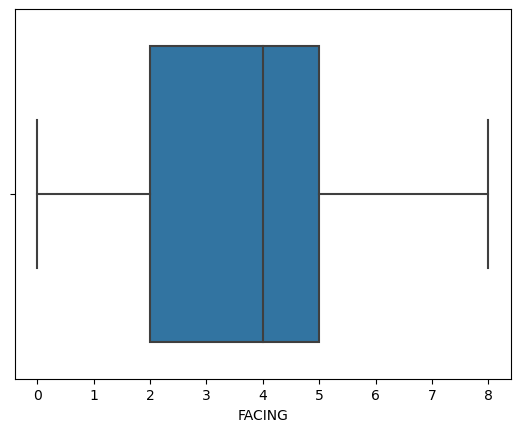

In [66]:
sns.boxplot(x=df['FACING'])

## AGE

In [67]:
df['AGE'].value_counts()

0-1 Year Old Property     4690
1-5 Year Old Property     3154
5-10 Year Old Property    2188
Name: AGE, dtype: int64

<Axes: >

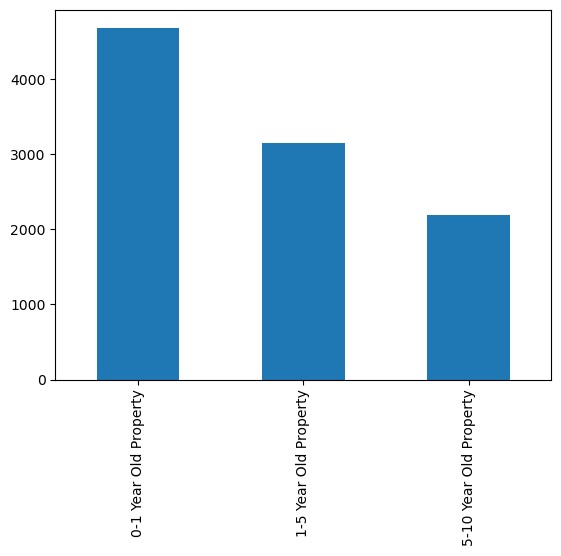

In [68]:

df["AGE"].value_counts().plot.bar()

## TOTAL_FLOOR

In [69]:
df['TOTAL_FLOOR'].value_counts()

high rise    5480
mid rise     3139
low rise     1413
Name: TOTAL_FLOOR, dtype: int64

<Axes: >

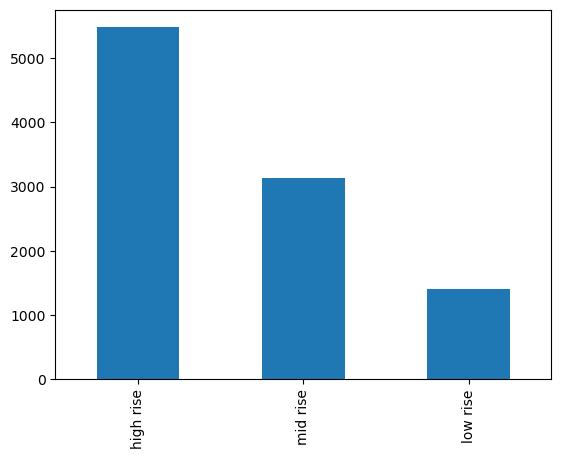

In [70]:
df['TOTAL_FLOOR'].value_counts().plot.bar()

## BEDROOM_NUM

In [71]:
df['BEDROOM_NUM'].value_counts()

3.0     4541
4.0     2602
2.0     1365
5.0      258
1.0      104
6.0       54
9.0       26
8.0       16
10.0      16
12.0      13
7.0       13
13.0       4
35.0       3
11.0       3
20.0       3
18.0       3
16.0       3
36.0       2
14.0       1
24.0       1
55.0       1
34.0       1
15.0       1
Name: BEDROOM_NUM, dtype: int64

<Axes: xlabel='BEDROOM_NUM'>

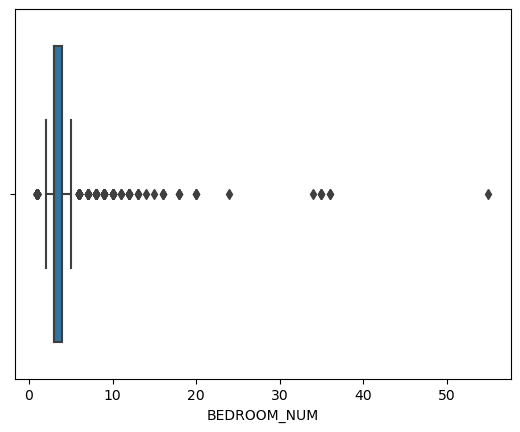

In [72]:
sns.boxplot(x =df['BEDROOM_NUM'])

<Axes: xlabel='BEDROOM_NUM', ylabel='Count'>

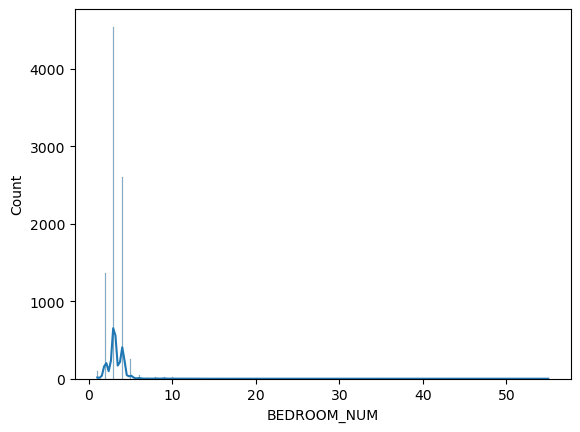

In [73]:
sns.histplot(df['BEDROOM_NUM'],kde= True)

<Axes: >

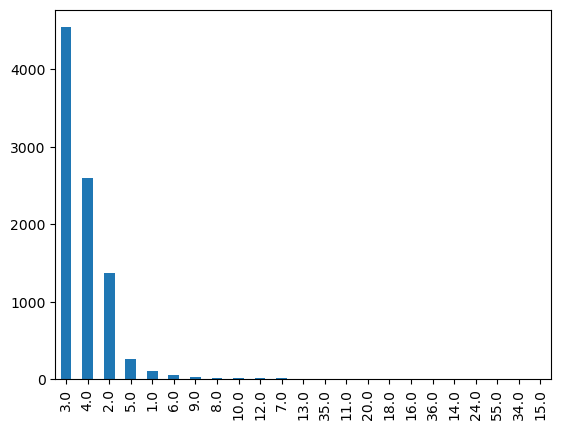

In [74]:
df['BEDROOM_NUM'].value_counts().plot.bar()

In [75]:
df[["BEDROOM_NUM","BHK_BED"]]

,BEDROOM_NUM,BHK_BED
0,3.0,3.0
1,3.0,3.0
2,5.0,5.0
3,4.0,4.0
4,3.0,3.0
...,...,...
10147,4.0,4.0
10148,3.0,3.0
10149,3.0,3.0
10150,NaN,NaN


In [76]:
gt_5bhk = df.query("BEDROOM_NUM>5")
print(gt_5bhk.shape)

(164, 32)


In [77]:
df.head(1)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
0,70597758,h70597758,gurgaon,31900000.0,20202.0,1579.0,9.0,3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,la vida by tata housing,NaN,low rise,28.532594,77.020297,3.0,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN,2,0,1,2,1,2,0


In [78]:
landmarks = ["TRNSPORTATION","ACCOMODATION", "LEISURE", "EDUCATION", "HEALTH", "OTHER"]
df[["TOTAL_LANDMARK_COUNT", *landmarks]]


,TOTAL_LANDMARK_COUNT,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER
0,9.0,2,0,1,2,1,2
1,12.0,2,1,1,2,1,1
2,9.0,1,2,1,2,1,1
3,9.0,1,2,1,2,1,1
4,9.0,1,2,1,2,1,1
...,...,...,...,...,...,...,...
10147,15.0,1,2,2,2,1,2
10148,15.0,1,2,2,2,1,2
10149,12.0,0,0,1,0,0,7
10150,27.0,0,0,3,0,3,1


<Axes: >

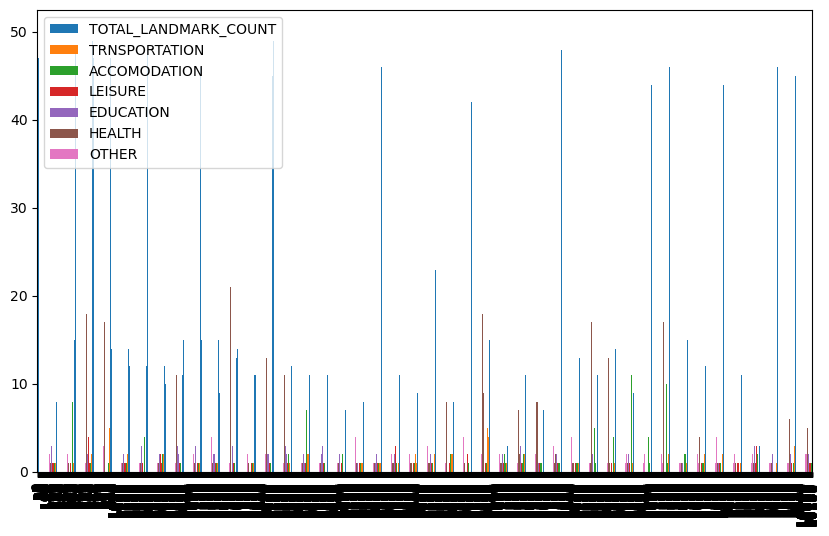

In [79]:
df[["TOTAL_LANDMARK_COUNT", *landmarks]].plot(kind='bar', figsize=(10, 6))

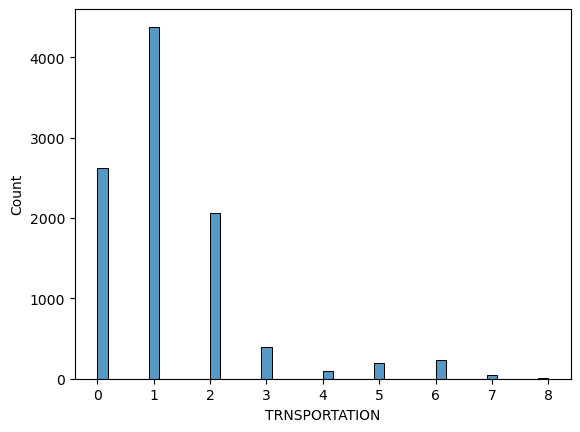

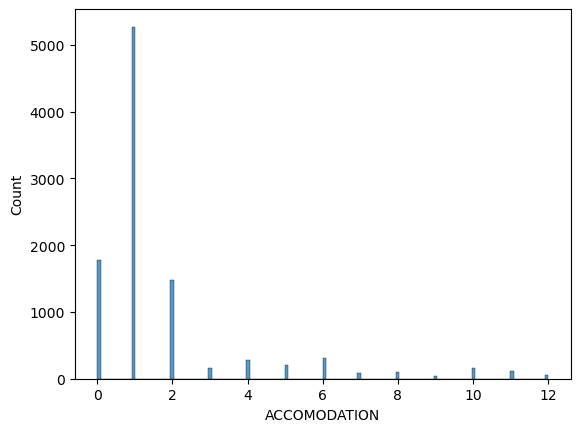

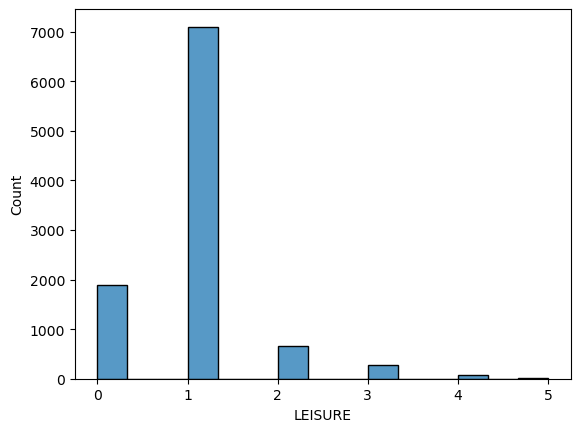

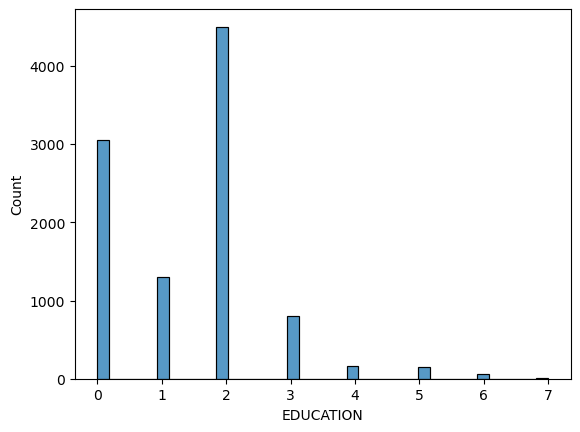

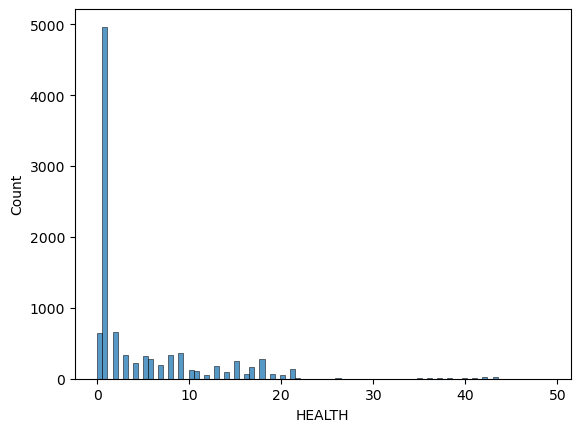

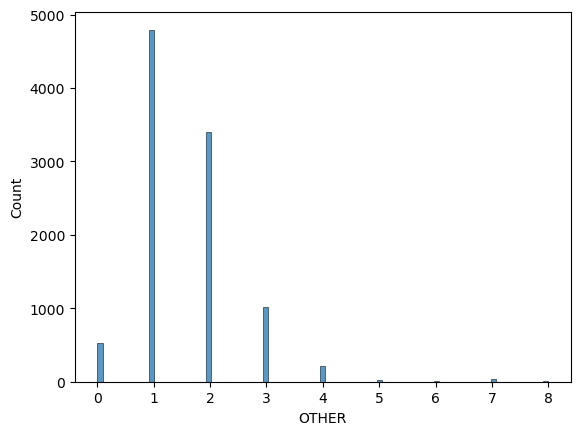

In [80]:
for col in landmarks:
    plt.figure()
    sns.histplot(df[col])

In [81]:
df.head(1)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
0,70597758,h70597758,gurgaon,31900000.0,20202.0,1579.0,9.0,3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,la vida by tata housing,NaN,low rise,28.532594,77.020297,3.0,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN,2,0,1,2,1,2,0


## PROP_NAME

In [82]:
df['PROP_NAME'].sample(10)

126     orris woodview residencies
3404                vipul belmonte
7689               pareena mi casa
4637                           NaN
7476                           NaN
2378                   ss the leaf
3004                           NaN
1955      emaar mgf emerald estate
3536                           NaN
4053      emaar mgf emerald estate
Name: PROP_NAME, dtype: object

<Axes: xlabel='PROP_NAME', ylabel='Count'>

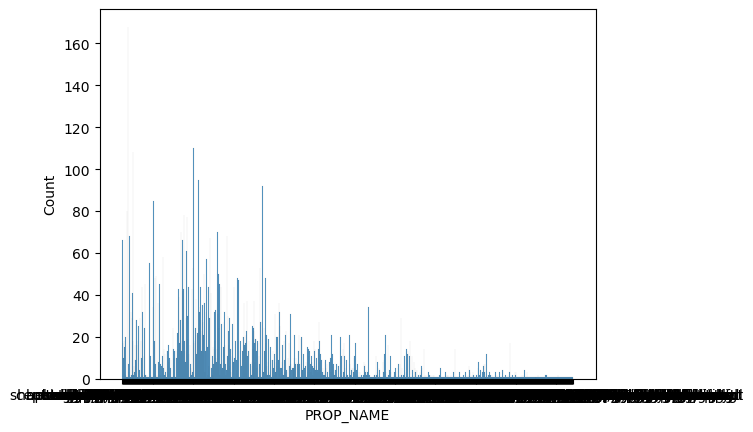

In [83]:
sns.histplot(df['PROP_NAME'])

## BUILDING_NAME and SOCIETY_NAME

In [84]:
df[["BUILDING_NAME", "SOCIETY_NAME"]]

,BUILDING_NAME,SOCIETY_NAME
0,la vida by tata housing,la vida by tata housing
1,emaar palm heights,emaar palm heights
2,tulip monsella,tulip monsella
3,tulip monsella,tulip monsella
4,tulip monsella,tulip monsella
...,...,...
10147,indiabulls centrum park,indiabulls centrum park
10148,indiabulls centrum park,indiabulls centrum park
10149,NaN,NaN
10150,ansals palam vihar,ansals palam vihar


In [85]:
df["BUILDING_NAME"].sample(10)

3967                        m3m escala
2351                    raheja atharva
4082                               NaN
4450                    m3m the marina
4542                               NaN
1150              bptp astaire gardens
5480               ireo victory valley
7678                   dlf the belaire
5105    signature global the millennia
7810            emaar the palm springs
Name: BUILDING_NAME, dtype: object

## SOCIETY_NAME

In [86]:
df['SOCIETY_NAME'].sample(10 , random_state=2)

8404                              paras dews
3692                      vipul tatvam villa
1817    shapoorji pallonji joyville gurugram
9703                  emaar the palm springs
4229                  pioneer urban presidia
254                        top rated builder
6706                                     NaN
8712                        puri emerald bay
9556                   vatika sovereign next
3408                            dlf the icon
Name: SOCIETY_NAME, dtype: object

## ADDRESS

In [87]:
df["ADDRESS"].sample(10)

4474                 sector 45
5330                       NaN
2003                       005
8393                       NaN
1098    dlf cyber city phase 3
7815                       123
6372                       NaN
7245                       555
7865                       NaN
9980                       777
Name: ADDRESS, dtype: object

## KMeans on LANDMARKS

In [88]:
landmarks_df = df[landmarks]

In [89]:
scaler = StandardScaler()
landmarks_scaled = scaler.fit_transform(landmarks_df)

In [90]:
cluster_range = range(1, 11)
wcss_reduced = []

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(landmarks_scaled)
    wcss_reduced.append(kmeans.inertia_)

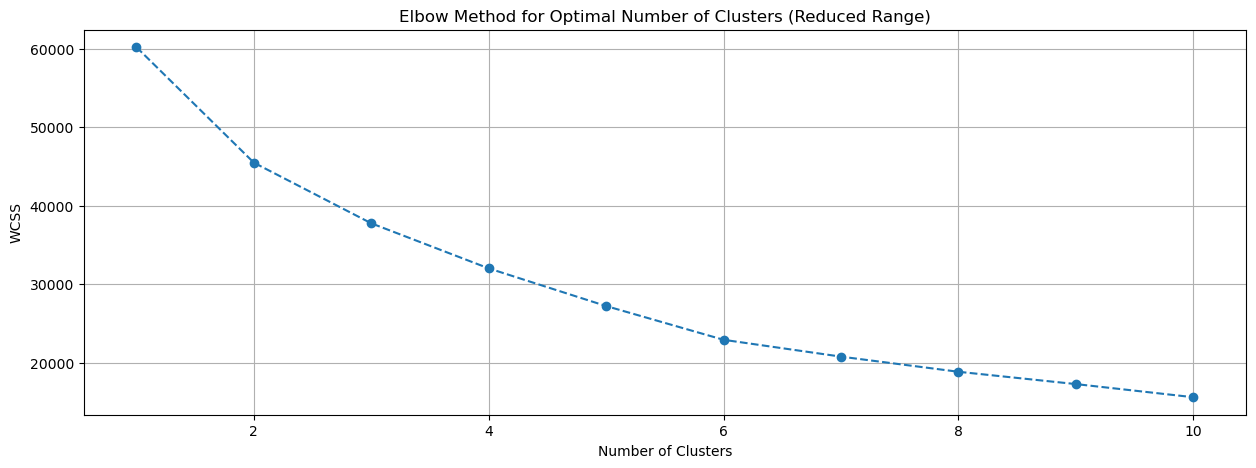

In [91]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(cluster_range, wcss_reduced, marker="o", linestyle="--")

plt.title("Elbow Method for Optimal Number of Clusters (Reduced Range)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [92]:
best_n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, init="k-means++", n_init=10, random_state=42)
kmeans.fit(landmarks_df)

# Predict the cluster assignments for each row
df["LANDMARKS_CLUSTER"] = kmeans.predict(landmarks_df)
df["LANDMARKS_CLUSTER"].value_counts()

1    7075
2    1545
0    1412
Name: LANDMARKS_CLUSTER, dtype: int64

## AMENITIES_SCORE¶

In [93]:
scores = ["AMENITIES_SCORE"]
df[["TOTAL_LANDMARK_COUNT"] + landmarks + scores].sample(10)

,TOTAL_LANDMARK_COUNT,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
5969,11.0,0,1,2,6,0,1,55
3597,9.0,1,1,1,1,1,1,55
3054,44.0,8,2,0,0,15,1,105
1246,9.0,1,1,1,0,1,2,141
415,10.0,1,1,1,2,1,1,55
7898,48.0,1,11,1,1,10,1,72
3806,11.0,0,1,2,6,0,1,52
1011,9.0,1,0,1,3,0,2,141
6105,7.0,1,1,1,1,1,1,141
8509,11.0,1,1,2,1,1,1,18


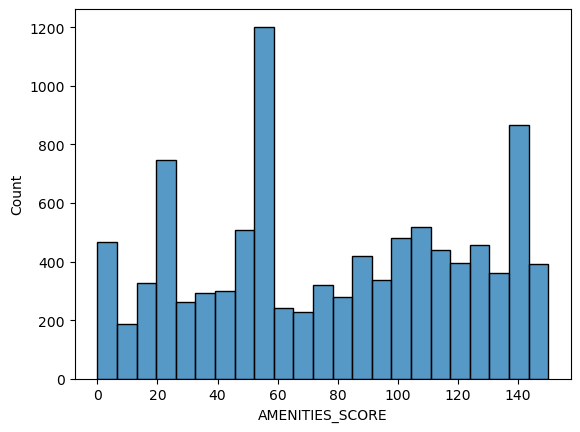

In [94]:
for col in scores:
    plt.figure()
    sns.histplot(df[col])

## KMeans on LANDMARKS

In [95]:
temp_df = df[landmarks + scores]
temp_df.isnull().sum()

TRNSPORTATION      0
ACCOMODATION       0
LEISURE            0
EDUCATION          0
HEALTH             0
OTHER              0
AMENITIES_SCORE    0
dtype: int64

In [96]:
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(temp_df)

In [97]:
cluster_range = range(1, 11)
wcss_reduced = []

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(temp_scaled)
    wcss_reduced.append(kmeans.inertia_)

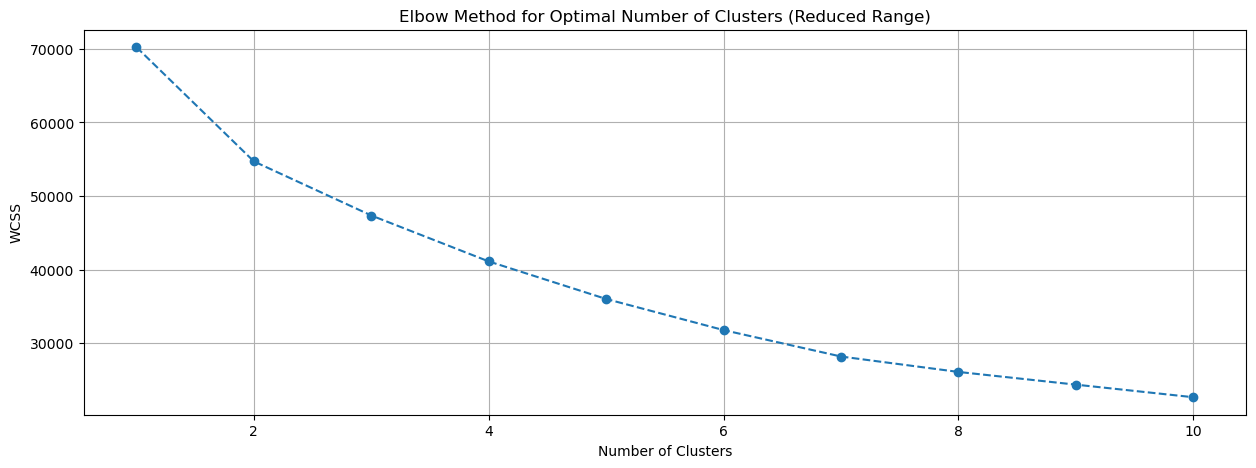

In [98]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(cluster_range, wcss_reduced, marker="o", linestyle="--")

plt.title("Elbow Method for Optimal Number of Clusters (Reduced Range)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [99]:
best_n_clusters = 4

# Fit the KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, init="k-means++", n_init=10, random_state=42)
kmeans.fit(temp_df)

# Predict the cluster assignments for each row
df["LANDMARKS_N_SCORES_CLUSTER"] = kmeans.predict(temp_df)
df["LANDMARKS_N_SCORES_CLUSTER"].value_counts()

2    2841
3    2518
1    2512
0    2161
Name: LANDMARKS_N_SCORES_CLUSTER, dtype: int64

## LANDMARKS_CLUSTER, LANDMARKS_W_SCORES_CLUSTER

In [100]:
clusters = ["LANDMARKS_CLUSTER", "LANDMARKS_N_SCORES_CLUSTER"]
df[clusters].value_counts()

LANDMARKS_CLUSTER  LANDMARKS_N_SCORES_CLUSTER
1                  3                             2134
                   1                             1970
                   2                             1747
                   0                             1224
2                  2                              551
0                  2                              543
                   0                              472
2                  0                              465
                   1                              301
0                  1                              241
2                  3                              228
0                  3                              156
dtype: int64

In [101]:
df.shape

(10032, 34)

In [102]:
df.head(1)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
0,70597758,h70597758,gurgaon,31900000.0,20202.0,1579.0,9.0,3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,0,1-5 Year Old Property,high rise,3.0,la vida by tata housing,NaN,low rise,28.532594,77.020297,3.0,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN,2,0,1,2,1,2,0,1,0


In [103]:
df.to_csv('gurgaon_10kk_After_EDA1_.csv', index=False)